# House price King County

In [1]:
# We work on an example to study the house sales in King county, USA.
# They provide a number of factors to predict house price.
# This can be casted as a regression problem.
# We study the two supervised learning method by using sklearn which are
# 1. Linear Regression, Ridge
# 2. RandomForestRegressor
# 

# Data can be downloaded from kaggle website below:
# https://www.kaggle.com/harlfoxem/housesalesprediction
#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Preprocessing

In [6]:
df.drop(['id','date','zipcode','lat','long'],axis=1,inplace=True)

In [7]:
# The 
print(df.loc[:,'yr_renovated'].min())
print(df.loc[:,'yr_renovated'].max())

0
2015


In [8]:
# Set years of renovated and bulit from 2015
# A better performance can be obtained by rescaling these two variables.
df.loc[df['yr_renovated']==0,'yr_renovated']=df['yr_built']
df['yr_built'] = 2015 - df['yr_built']
df['yr_renovated']=2015-df['yr_renovated']

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,60,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,24,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,82,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,50,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,28,1800,7503


# Split the data into the training and test sets

In [10]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

# Ridge method

In [12]:
# Work in a pipeline: first standardize the data and perform Ridge method

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [14]:
steps=[('scale',StandardScaler()),('clf',Ridge())]
pipeline=Pipeline(steps)

In [15]:
param_grid={'clf__alpha':np.arange(1,20,2)}
#param_grid={'clf__alpha':[10,50,100,200]}

In [16]:
# Using Gridsearch to search the best parameters

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
clf_cv=GridSearchCV(pipeline,param_grid)

In [19]:
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__alpha': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
# The performance between the traning and testing sets are quite close.
print(clf_cv.best_params_)
print(clf_cv.score(X_train,y_train))
print(clf_cv.score(X_test,y_test))

{'clf__alpha': 19}
0.653803044384
0.651586777143


In [21]:
## Learning Curve
# It is useful to validate the result
from sklearn.learning_curve import learning_curve
steps=[('scale2',StandardScaler()),('clf2',Ridge(alpha=clf_cv.best_params_['clf__alpha']))]
pipeline2=Pipeline(steps)

train_sizes,train_scores,test_scores=learning_curve(estimator=pipeline2,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10))

train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
print("Mean of training score is {}".format(train_mean))
print("Mean of testing score is {}".format(test_mean))

Mean of training score is [ 0.65200016  0.64321272  0.64218301  0.6423496   0.63979891  0.6419123
  0.64544656  0.6486974   0.65220891  0.65406529]
Mean of testing score is [ 0.63427358  0.64394027  0.6459546   0.64783752  0.64954745  0.64982651
  0.65032076  0.65072403  0.65100279  0.65106461]


C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


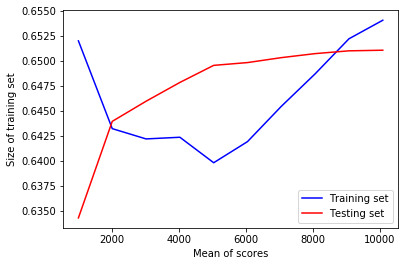

In [22]:
plt.plot(train_sizes,train_mean,color='b',label="Training set")
plt.plot(train_sizes,test_mean,color='r',label="Testing set")
plt.ylabel("Size of training set")
plt.xlabel("Mean of scores")
plt.legend()
plt.show()

In [23]:
# Validation Curve
# It is useful to study the parameters between the training and testing sets.
from sklearn.learning_curve import validation_curve
steps=[('scale2',StandardScaler()),('clf2',Ridge())]
pipeline2=Pipeline(steps)
param_range=np.arange(1,20,2)
train_scores,test_scores=validation_curve(estimator=pipeline2,X=X_train,y=y_train,param_name='clf2__alpha',param_range=param_range)

train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

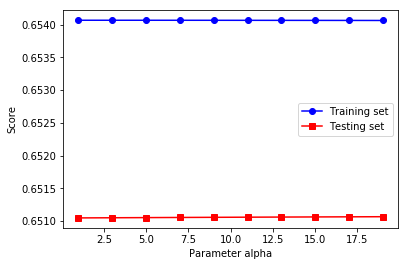

In [24]:
plt.plot(param_range,train_mean,color='b',marker='o',label="Training set")
plt.plot(param_range,test_mean,color='r',marker='s',label="Testing set")
plt.ylabel("Score")
plt.xlabel("Parameter alpha")
plt.legend()
plt.show()

# RandomForest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
steps=[('scale',StandardScaler()),('clf',RandomForestRegressor())]
pipeline=Pipeline(steps)
param_dist={'clf__n_estimators':np.arange(2,100,2),'clf__max_depth':np.arange(1,20,1)}

In [26]:
# Using RandomizedSearch method to find the best parameters

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
clf_cv=RandomizedSearchCV(pipeline,param_dist,cv=5)

In [29]:
clf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_spli...imators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]), 'clf__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='war

In [32]:
# Best parameters
print(clf_cv.best_params_)
# Two scores show a larger difference. The higher score is obtained.
print("Score of training set is {}".format(clf_cv.score(X_train,y_train)))
print("Score of testing set is {}".format(clf_cv.score(X_test,y_test)))

{'clf__n_estimators': 72, 'clf__max_depth': 18}
Score of training set is 0.9561462896048495
Score of testing set is 0.7245812505365378


In [33]:
## Learning Curve
steps=[('scale2',StandardScaler()),('clf2',RandomForestRegressor(n_estimators=clf_cv.best_params_['clf__n_estimators']))]
pipeline2=Pipeline(steps)

train_sizes,train_scores,test_scores=learning_curve(estimator=pipeline2,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10))

train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

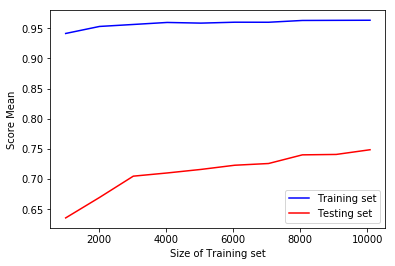

In [34]:
plt.plot(train_sizes,train_mean,color='b',label="Training set")
plt.plot(train_sizes,test_mean,color='r',label="Testing set")
plt.xlabel("Size of Training set")
plt.ylabel("Score Mean")
plt.legend()
plt.show()

In [35]:
# Validation Curve
steps=[('scale2',StandardScaler()),('clf2',RandomForestRegressor())]
pipeline2=Pipeline(steps)
param_range=np.arange(2,100,2)
train_scores,test_scores=validation_curve(estimator=pipeline2,X=X_train,y=y_train,param_name='clf2__n_estimators',param_range=param_range)

train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

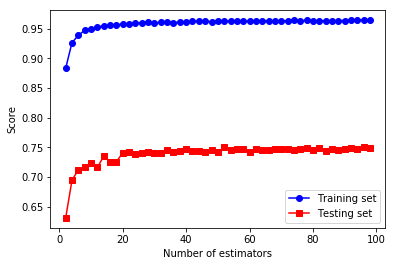

In [36]:
plt.plot(param_range,train_mean,color='b',marker='o',label="Training set")
plt.plot(param_range,test_mean,color='r',marker='s',label="Testing set")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.legend()
plt.show()